In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from floweaver import *
from ipysankeywidget import SankeyWidget
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Administrator.PC-20160914KUGY/Desktop/ccf_online_stage1_train.csv',nrows=7000000)

In [3]:
plt.style.use('ggplot')

In [4]:
df.head()

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 7 columns):
User_id          int64
Merchant_id      int64
Action           int64
Coupon_id        object
Discount_rate    object
Date_received    float64
Date             float64
dtypes: float64(2), int64(3), object(2)
memory usage: 373.8+ MB


# 电商数据分析

In [6]:
data = df.drop(['Coupon_id','Discount_rate','Date_received'],axis=1)
data = data[data['Action']!=2]

In [7]:
# 进行逻辑判断的时候
# 可以写data['YesNot'] = np.where(np.logical_and(data.Coupon_id == 'None',data.Date == 'None'),'yes','not')
# 或者写data['YesNot']= np.where((data.Coupon_id == 'None')&(data.Date == 'None'),'yes','not')

In [8]:
data['Date'] = data['Date'].astype(object)
data['Date'] = pd.to_datetime(data['Date'],format='%Y%m%d',errors='ignore')

In [9]:
data['month'] = data['Date'].values.astype('datetime64[M]')

In [10]:
data.head()

,User_id,Merchant_id,Action,Date,month
1,13740231,34805,1,2016-03-21,2016-03-01
2,14336199,18907,0,2016-06-18,2016-06-01
3,14336199,18907,0,2016-06-18,2016-06-01
4,14336199,18907,0,2016-06-18,2016-06-01
5,14336199,18907,0,2016-06-18,2016-06-01


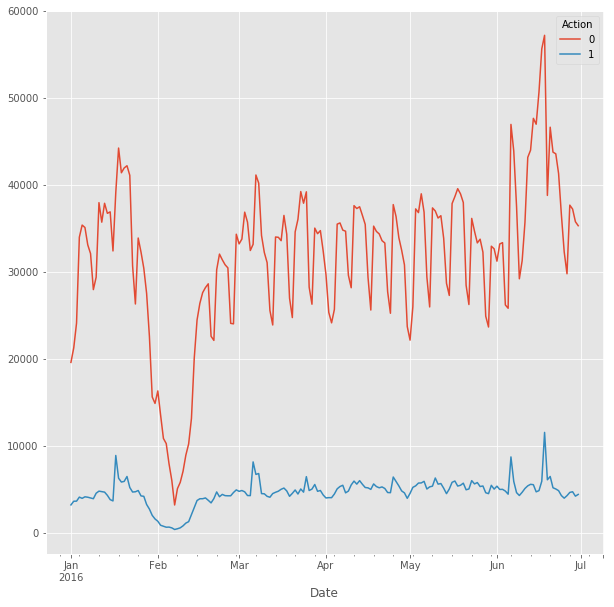

In [11]:
groupby = data.groupby(['Date','Action']).count()
fig,ax = plt.subplots(figsize=(10,10))
groupby['User_id'].unstack().plot(ax=ax)
#0为点击量，1为购买量

In [12]:
# 将每个月的图分配到各个ax上
# fig,ax = plt.subplots(6,1,figsize=(20,50))
# def month(date,i):
#     data1 = data[data['month']==date]
#     groupby1 = data1.groupby(['Date','Action']).count()
#     groupby1['User_id'].unstack().plot(ax=ax[i])

# for key1,key2 in  zip(np.sort(pd.unique(data['month'])),range(6)):
#     month(key1,key2)

## 复购率分析

In [13]:
purchase_data = data[data['Action']==1]
purchase_data.head(10)

,User_id,Merchant_id,Action,Date,month
1,13740231,34805,1,2016-03-21,2016-03-01
19,10539231,12008,1,2016-06-18,2016-06-01
21,10539231,12008,1,2016-06-18,2016-06-01
75,15137031,18206,1,2016-05-14,2016-05-01
76,15137031,18206,1,2016-05-14,2016-05-01
77,15137031,18206,1,2016-05-14,2016-05-01
78,15137031,18206,1,2016-05-14,2016-05-01
79,15137031,18206,1,2016-05-14,2016-05-01
80,15137031,18206,1,2016-05-14,2016-05-01
81,15137031,18206,1,2016-05-14,2016-05-01


In [14]:
purchase_pivot_table = purchase_data.pivot_table(index='User_id',columns='month',values='Action',aggfunc='count').fillna(0)
purchase_pivot_table.head()

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
User_id,,,,,,
64,0.0,0.0,0.0,0.0,0.0,1.0
165,0.0,0.0,0.0,1.0,0.0,0.0
184,0.0,0.0,0.0,1.0,0.0,1.0
209,0.0,0.0,0.0,0.0,4.0,0.0
215,0.0,5.0,1.0,0.0,1.0,0.0


In [15]:
Repurchase = purchase_pivot_table.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
Repurchase.head()

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
User_id,,,,,,
64,NaN,NaN,NaN,NaN,NaN,0.0
165,NaN,NaN,NaN,0.0,NaN,NaN
184,NaN,NaN,NaN,0.0,NaN,0.0
209,NaN,NaN,NaN,NaN,1.0,NaN
215,NaN,1.0,0.0,NaN,0.0,NaN


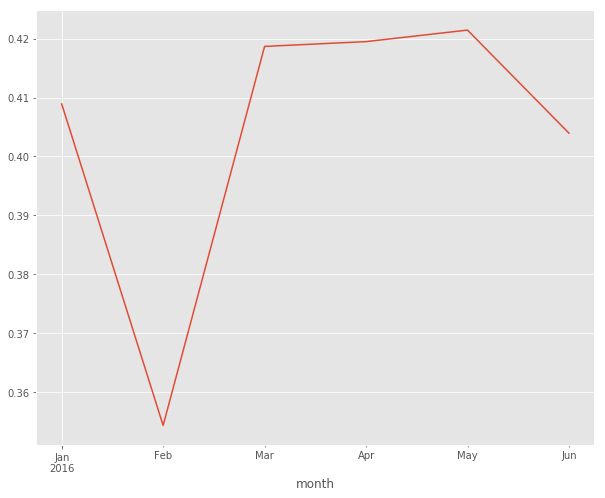

In [16]:
(Repurchase.sum()/Repurchase.count()).plot(figsize=(10,8))

## 回购率分析

In [18]:
Buyback = purchase_pivot_table.applymap(lambda x : 1 if x > 0 else 0)
Buyback.head()

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
User_id,,,,,,
64,0,0,0,0,0,1
165,0,0,0,1,0,0
184,0,0,0,1,0,1
209,0,0,0,0,1,0
215,0,1,1,0,1,0


In [19]:
# range(6-1)是因为最后一个月无法算，比如数据中只有六月的数据，
# 没有七月的数据，所以整个六月是NaN，因此才加上代码(1)
def Buyback_agg(data):
    status = []
    for i in range(6-1):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)#代码（1）
    return status
Buyback_rate = Buyback.apply(Buyback_agg,axis=1)
Buyback_rate.head()

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
User_id,,,,,,
64,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,0.0,NaN,NaN
184,NaN,NaN,NaN,0.0,NaN,NaN
209,NaN,NaN,NaN,NaN,0.0,NaN
215,NaN,1.0,0.0,NaN,0.0,NaN


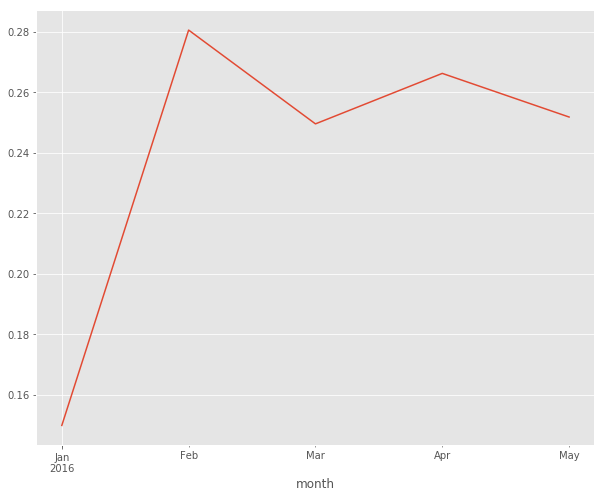

In [20]:
(Buyback_rate.sum()/Buyback_rate.count()).plot(figsize=(10,8))

## 用户分层

In [21]:
'''用户等级划分为潜在用户，新用户，活跃用户，忠诚用户，流失用户，回流用户'''
def UserLevel_agg(data):
    UserStatus = []
    for i in range(6):
        if data[i] == 0:
            if len(UserStatus) == 0:
                UserStatus.append('potential_User')
            else:
                if UserStatus[i-1] == 'potential_User':
                    UserStatus.append('potential_User')
                else:
                    UserStatus.append('lost_User')
        else:
            if len(UserStatus) == 0:
                UserStatus.append('new_User')
            else:
                if UserStatus[i-1] == 'potential_User':
                    UserStatus.append('new_User')
                elif UserStatus[i-1] == 'new_User':
                    UserStatus.append('active_User')
                elif UserStatus[i-1] == 'active_User':
                    UserStatus.append('vip')
                elif UserStatus[i-1] == 'vip':
                    UserStatus.append('vip')
                elif UserStatus[i-1] == 'lost_User':
                    UserStatus.append('return_User')
                elif UserStatus[i-1] == 'return_User':
                    UserStatus.append('active_User')
                else:
                    UserStatus.append('error')
    return UserStatus

UserLevel = purchase_pivot_table.applymap(lambda x : 1 if x > 0 else 0)
UL = UserLevel.apply(UserLevel_agg,axis=1)
UL.head()

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
User_id,,,,,,
64,potential_User,potential_User,potential_User,potential_User,potential_User,new_User
165,potential_User,potential_User,potential_User,new_User,lost_User,lost_User
184,potential_User,potential_User,potential_User,new_User,lost_User,return_User
209,potential_User,potential_User,potential_User,potential_User,new_User,lost_User
215,potential_User,new_User,active_User,lost_User,return_User,lost_User


In [22]:
UL_counts = UL.apply(lambda x : pd.value_counts(x)).fillna(0)
UL_counts.head(6)

month,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00
active_User,0.0,9678.0,7184,13943,12421,13045.0
lost_User,0.0,54884.0,72131,113826,145784,179980.0
new_User,64562.0,29151.0,50139,40924,38562,32142.0
potential_User,190918.0,161767.0,111628,70704,32142,0.0
return_User,0.0,0.0,10689,12128,20103,23829.0
vip,0.0,0.0,3709,3955,6468,6484.0


In [23]:
import plotly
plotly.tools.set_credentials_file(username='Expyh', api_key='bTx6nBJfQE7bfVnrqK0R')
import plotly.plotly as py

sankey_data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = [
          "new_User_1", "potential_User_1",#0,1
          "active_User_2", "lost_User_2", "new_User_2", "potential_User_2",#2,3,4,5
          "active_User_3", "lost_User_3", "new_User_3", "potential_User_3","return_User_3","vip_3",#6,7,8,9,10,11
          'active_User_4', 'lost_User_4', 'new_User_4', 'potential_User_4', 'return_User_4', 'vip_4',#12,13,14,15,16,17
          
      ],
      color = ["blue","blue","black","black","black","black","red","red","red","red","red","red","red","yellow"]
    ),
    link = dict(
      source = [0,0,1,1,4,4,5,5,2,2,3,3],
      target = [2,3,4,5,6,7,8,9,7,11,10,7],
      value = [135,783,418,2400,109,309,735,1665,90,45,154,629]
  ))

layout =  dict(
    title = "Basic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[sankey_data], layout=layout)
py.iplot(fig, validate=False)

## 生命周期

In [23]:
Date_min = purchase_data.groupby('User_id')['Date'].min()
Date_max = purchase_data.groupby('User_id')['Date'].max()

In [24]:
(Date_max-Date_min).head()

User_id
64     0 days
165    0 days
184   66 days
209    0 days
215   99 days
Name: Date, dtype: timedelta64[ns]

In [25]:
life_time = (Date_max-Date_min).reset_index()
life_time.head()

,User_id,Date
0,64,0 days
1,165,0 days
2,184,66 days
3,209,0 days
4,215,99 days


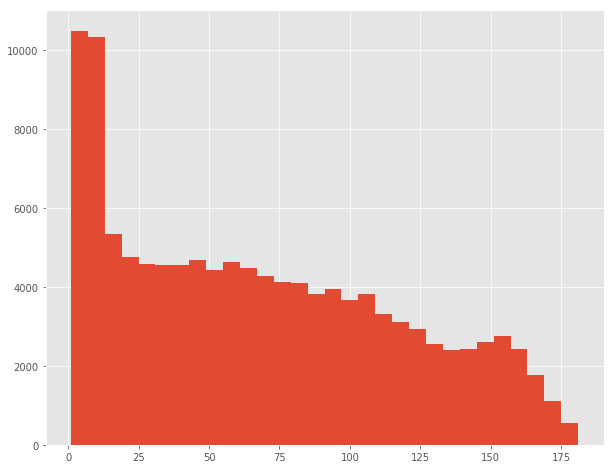

In [26]:
life_time['life_time'] = life_time['Date']/np.timedelta64(1,'D')
life_time[life_time['life_time']>0]['life_time'].hist(bins=30,figsize=(10,8))

In [27]:
life_time[life_time['life_time']>0]['life_time'].describe()

count    118530.000000
mean         67.925715
std          49.250694
min           1.000000
25%          23.000000
50%          62.000000
75%         106.000000
max         181.000000
Name: life_time, dtype: float64

## 留存率

In [28]:
Retention = pd.merge(left=purchase_data,right=Date_min.reset_index(),how='inner',on='User_id',suffixes=('','_first'))
Retention['Date_differ'] = Retention['Date'] - Retention['Date_first']
Retention.head()

,User_id,Merchant_id,Action,Date,month,Date_first,Date_differ
0,13740231,34805,1,2016-03-21,2016-03-01,2016-02-12,38 days
1,13740231,19504,1,2016-06-06,2016-06-01,2016-02-12,115 days
2,13740231,18304,1,2016-03-31,2016-03-01,2016-02-12,48 days
3,13740231,18907,1,2016-02-12,2016-02-01,2016-02-12,0 days
4,10539231,12008,1,2016-06-18,2016-06-01,2016-06-18,0 days


In [29]:
Retention['Date_differ_astype'] = Retention['Date_differ'].apply(lambda x : x/np.timedelta64(1,'D'))
Retention.head()

,User_id,Merchant_id,Action,Date,month,Date_first,Date_differ,Date_differ_astype
0,13740231,34805,1,2016-03-21,2016-03-01,2016-02-12,38 days,38.0
1,13740231,19504,1,2016-06-06,2016-06-01,2016-02-12,115 days,115.0
2,13740231,18304,1,2016-03-31,2016-03-01,2016-02-12,48 days,48.0
3,13740231,18907,1,2016-02-12,2016-02-01,2016-02-12,0 days,0.0
4,10539231,12008,1,2016-06-18,2016-06-01,2016-06-18,0 days,0.0


In [30]:
bin = [0,3,7,15,30,60,90,180,365]
Retention['Date_differ_bins'] = pd.cut(Retention['Date_differ_astype'],bins=bin)
Retention.head()

,User_id,Merchant_id,Action,Date,month,Date_first,Date_differ,Date_differ_astype,Date_differ_bins
0,13740231,34805,1,2016-03-21,2016-03-01,2016-02-12,38 days,38.0,"(30, 60]"
1,13740231,19504,1,2016-06-06,2016-06-01,2016-02-12,115 days,115.0,"(90, 180]"
2,13740231,18304,1,2016-03-31,2016-03-01,2016-02-12,48 days,48.0,"(30, 60]"
3,13740231,18907,1,2016-02-12,2016-02-01,2016-02-12,0 days,0.0,NaN
4,10539231,12008,1,2016-06-18,2016-06-01,2016-06-18,0 days,0.0,NaN


In [31]:
pivoted_Retention = Retention.pivot_table(index='User_id',columns='Date_differ_bins',
                                          values='Action',aggfunc=sum)
pivoted_Retention.head()

Date_differ_bins,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
User_id,,,,,,,,
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,2.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN


In [32]:
Retention_count = pivoted_Retention.fillna(0).applymap(lambda x : 1 if x > 0 else 0)
Retention_count.head()

Date_differ_bins,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
User_id,,,,,,,,
64,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0
209,0,0,0,0,0,0,0,0
215,1,0,1,0,1,0,1,0


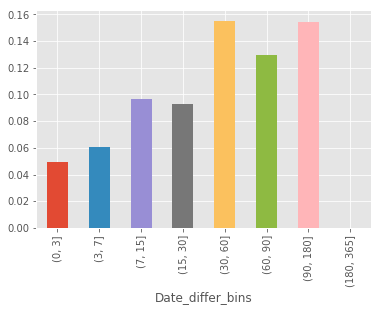

In [33]:
(Retention_count.sum()/Retention_count.count()).plot.bar()